In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import requests
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
review_list = []
base_url = "https://www.amazon.in/Storage-Battery-SUPERVOOC-Charger-Microlens/product-reviews/B082DSTWZ1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

for page_number in range(1,6):
    link = base_url.format(page_number)
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')
    reviews = soup.find_all('span', class_='review-text-content')

    for review in reviews:
        review_list.append(review.get_text().strip())



In [ ]:
review_list

['Loved it..',
 'Best phone 📱',
 'Return of damaged device oppo 23 was not Return on 15.09.23. Due to emi no not available because device is not opening. Please see the matter.',
 'Worth it',
 'Oppo Neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone. But in this case this phone has almost all the similar features that we have already seen in oppo A74 5G or oppo f3 phones. When customers aur purchasing new phones there should be new features incorporated in the new models. It has got 8GB RAM and 256 internal memory which is a very good part. However looks wise the phone is very similar to the old models.',
 'I was looking for smartphone within mid level price range and happy with my purchase. Battery life is good, camera works great in all modes, Super fast charging, display and navigation smooth. It is one of the best phone with price <=20k (including offers).',
 'Good product, value for money, nice performance, camera 

In [ ]:
len(review_list)

30

In [ ]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 500)

In [ ]:
df.size

30

In [ ]:
df.head()

,Reviews
0,Loved it..
1,Best phone 📱
2,Return of damaged device oppo 23 was not Return on 15.09.23. Due to emi no not available because device is not opening. Please see the matter.
3,Worth it
4,Oppo Neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone. But in this case this phone has almost all the similar features that we have already seen in oppo A74 5G or oppo f3 phones. When customers aur purchasing new phones there should be new features incorporated in the new models. It has got 8GB RAM and 256 internal memory which is a very good part. However looks wise the phone is very similar to the old models.


TEXT Preprocessing


In [ ]:
df['cleaned_reviews'] = df['Reviews'].str.lower()
# converting lower case  of all letters

In [ ]:
df.head()

,Reviews,cleaned_reviews
0,Loved it..,loved it..
1,Best phone 📱,best phone 📱
2,Return of damaged device oppo 23 was not Return on 15.09.23. Due to emi no not available because device is not opening. Please see the matter.,return of damaged device oppo 23 was not return on 15.09.23. due to emi no not available because device is not opening. please see the matter.
3,Worth it,worth it
4,Oppo Neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone. But in this case this phone has almost all the similar features that we have already seen in oppo A74 5G or oppo f3 phones. When customers aur purchasing new phones there should be new features incorporated in the new models. It has got 8GB RAM and 256 internal memory which is a very good part. However looks wise the phone is very similar to the old models.,oppo neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone. but in this case this phone has almost all the similar features that we have already seen in oppo a74 5g or oppo f3 phones. when customers aur purchasing new phones there should be new features incorporated in the new models. it has got 8gb ram and 256 internal memory which is a very good part. however looks wise the phone is very similar to the old models.


In [ ]:
df['cleaned_reviews']=[re.sub('[^A-Za-z ]+', '',x)for x in df['cleaned_reviews']]
df.head()

,Reviews,cleaned_reviews
0,Loved it..,loved it
1,Best phone 📱,best phone
2,Return of damaged device oppo 23 was not Return on 15.09.23. Due to emi no not available because device is not opening. Please see the matter.,return of damaged device oppo was not return on due to emi no not available because device is not opening please see the matter
3,Worth it,worth it
4,Oppo Neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone. But in this case this phone has almost all the similar features that we have already seen in oppo A74 5G or oppo f3 phones. When customers aur purchasing new phones there should be new features incorporated in the new models. It has got 8GB RAM and 256 internal memory which is a very good part. However looks wise the phone is very similar to the old models.,oppo neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone but in this case this phone has almost all the similar features that we have already seen in oppo a g or oppo f phones when customers aur purchasing new phones there should be new features incorporated in the new models it has got gb ram and internal memory which is a very good part however looks wise the phone is very similar to the old models


In [ ]:
stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
df["cleaned_reviews"]= df["cleaned_reviews"].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords.words("english")]))

In [ ]:
df.head()

,Reviews,cleaned_reviews
0,Loved it..,loved
1,Best phone 📱,best phone
2,Return of damaged device oppo 23 was not Return on 15.09.23. Due to emi no not available because device is not opening. Please see the matter.,return damaged device oppo return due emi available device opening please see matter
3,Worth it,worth
4,Oppo Neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone. But in this case this phone has almost all the similar features that we have already seen in oppo A74 5G or oppo f3 phones. When customers aur purchasing new phones there should be new features incorporated in the new models. It has got 8GB RAM and 256 internal memory which is a very good part. However looks wise the phone is very similar to the old models.,oppo neo understand need customer develop colour way customers love operate phone case phone almost similar features already seen oppo g oppo f phones customers aur purchasing new phones new features incorporated new models got gb ram internal memory good part however looks wise phone similar old models


In [ ]:
stemmer = PorterStemmer()

In [ ]:
df["cleaned_reviews"] = df["cleaned_reviews"].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [ ]:
df.sample()

,Reviews,cleaned_reviews
17,Not bad,bad


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

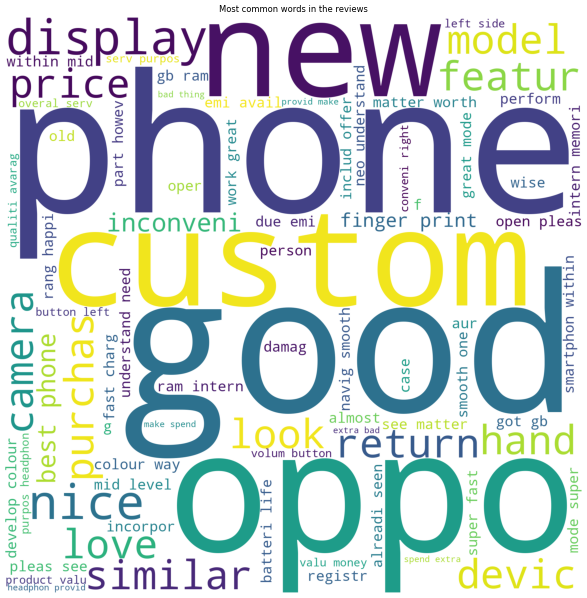

In [ ]:

wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
si = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_score(text):
    score=si.polarity_scores(text)
    return score['compound']

In [ ]:
df["sentiment_score"] = df["cleaned_reviews"].apply(lambda x:sentiment_score(x))

In [ ]:
df.head()

,Reviews,cleaned_reviews,sentiment_score
0,Loved it..,love,0.6369
1,Best phone 📱,best phone,0.6369
2,Return of damaged device oppo 23 was not Return on 15.09.23. Due to emi no not available because device is not opening. Please see the matter.,return damag devic oppo return due emi avail devic open pleas see matter,0.0258
3,Worth it,worth,0.2263
4,Oppo Neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone. But in this case this phone has almost all the similar features that we have already seen in oppo A74 5G or oppo f3 phones. When customers aur purchasing new phones there should be new features incorporated in the new models. It has got 8GB RAM and 256 internal memory which is a very good part. However looks wise the phone is very similar to the old models.,oppo neo understand need custom develop colour way custom love oper phone case phone almost similar featur alreadi seen oppo g oppo f phone custom aur purchas new phone new featur incorpor new model got gb ram intern memori good part howev look wise phone similar old model,0.8807


In [ ]:
def sen_cat(x):
  if(x>0.5):
    return "Possitive"
  elif(x<-0.5):
    return "Negative"
  else:
    return "Neutral"

In [ ]:
#for i in df["sentiment_score"]:
df["Catageory of Review"] = df["sentiment_score"].apply(sen_cat)



In [ ]:
df.head()

,Reviews,cleaned_reviews,sentiment_score,Catageory of Review
0,Loved it..,love,0.6369,Possitive
1,Best phone 📱,best phone,0.6369,Possitive
2,Return of damaged device oppo 23 was not Return on 15.09.23. Due to emi no not available because device is not opening. Please see the matter.,return damag devic oppo return due emi avail devic open pleas see matter,0.0258,Neutral
3,Worth it,worth,0.2263,Neutral
4,Oppo Neo understand the need of customer and develop the colour was in such a way that customers love to operate the phone. But in this case this phone has almost all the similar features that we have already seen in oppo A74 5G or oppo f3 phones. When customers aur purchasing new phones there should be new features incorporated in the new models. It has got 8GB RAM and 256 internal memory which is a very good part. However looks wise the phone is very similar to the old models.,oppo neo understand need custom develop colour way custom love oper phone case phone almost similar featur alreadi seen oppo g oppo f phone custom aur purchas new phone new featur incorpor new model got gb ram intern memori good part howev look wise phone similar old model,0.8807,Possitive


In [ ]:
df["Catageory of Review"].unique()

array(['Possitive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
df["Catageory of Review"].value_counts()

Possitive    15
Neutral      12
Negative      3
Name: Catageory of Review, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
category_counts= df["Catageory of Review"].value_counts()

([<matplotlib.patches.Wedge at 0x7b2e268523e0>,
 [Text(-0.848528137423857, 0.8485281374238571, 'Possitive'),
  Text(0.4993895680663522, -0.98010716725596, 'Neutral'),
  Text(0.9801071555669031, 0.49938959100741653, 'Negative')],
 [Text(-0.4949747468305832, 0.4949747468305833, '50.0%'),
  Text(0.2723943098543739, -0.5346039094123418, '40.0%'),
  Text(0.5346039030364925, 0.2723943223676817, '10.0%')])

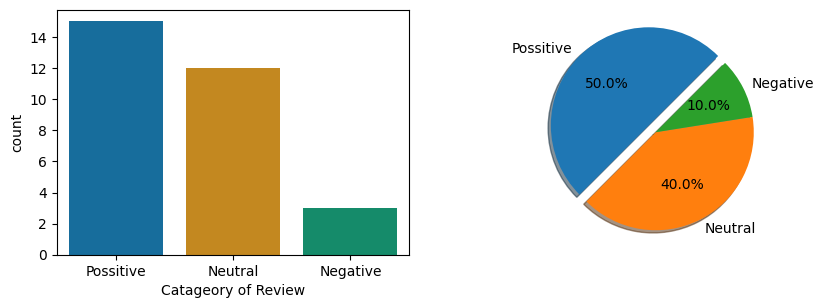

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x=df["Catageory of Review"],palette="colorblind")
plt.subplot(2,2,2)
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=45,shadow=True,explode=(0.1,0,0))